# What makes movies fail?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

# Run preprocess.py to add inflation adjusted revenue and budget columns to the MovieSummaries and the Imdb datasets
# from preprocess import preprocess
# preprocess()

/home/anton/Desktop/ada/ada-2022-project-adamax/src/preprocess.py:30: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(f'{imdbPath}/movies_metadata.csv')


In [9]:
# Create the dataframes that contain failing movies

# Get the movies that had negative profits
df_neg_profit = get_imdb_movies()
df_neg_profit = df_neg_profit[df_neg_profit["adj_profit"] < 0]

/home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py:39: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{imdbPath}/movies_metadata.csv')


Number of movies that had negative profits:  5106


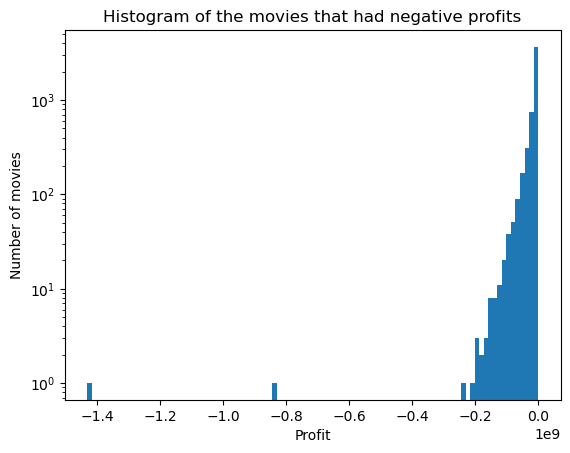

The top 10 movies that had the lowest profits:
                                                  title    adj_profit
1901                                         Metropolis -1.432241e+09
8635                                      War and Peace -8.363272e+08
2174                                              Them! -2.316844e+08
7090   Intolerance: Love's Struggle Throughout the Ages -2.086904e+08
21175                                   The Lone Ranger -1.927500e+08
43190                                  Band of Brothers -1.912549e+08
14823                                       The Wolfman -1.863994e+08
8585                                  What a Way to Go! -1.748194e+08
6634                              The Rules of the Game -1.724789e+08
32849    Pokémon the Movie: Hoopa and the Clash of Ages -1.714877e+08


In [14]:
# Inspect the dataframe with the movies that had negative profits

# Get the number of movies that had negative profits
print("Number of movies that had negative profits: ", len(df_neg_profit))

# Plot a histogram of the movies that had negative profits with log y
df_neg_profit["adj_profit"].plot.hist(bins=100, log=True)
plt.title("Histogram of the movies that had negative profits")
plt.xlabel("Profit")
plt.ylabel("Number of movies")
plt.show()

# The top 10 movies that had the lowest profits
print("The top 10 movies that had the lowest profits:")
print(df_neg_profit.sort_values(by="adj_profit", ascending=True).head(10)[["title", "adj_profit"]])

/home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py:39: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{imdbPath}/movies_metadata.csv')


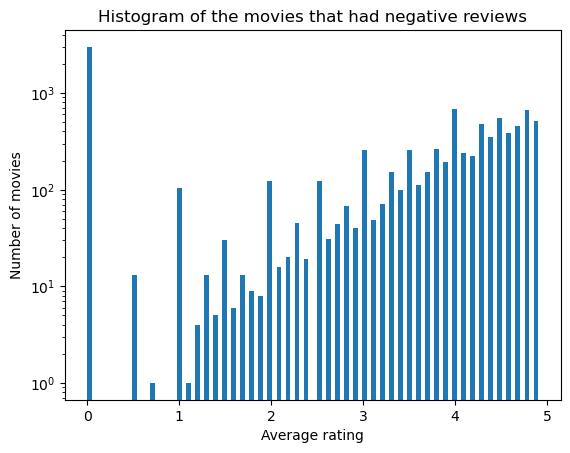

In [16]:
# Get movies with negative reviews
df_neg_reviews = get_imdb_movies()
# Take the lowest quantile movies by average rating
df_neg_reviews = df_neg_reviews[df_neg_reviews["vote_average"] < df_neg_reviews["vote_average"].quantile(0.25)]
# Plot ta histogram of the reviews with log y
df_neg_reviews["vote_average"].plot.hist(bins=100, log=True)
plt.title("Histogram of the movies that had negative reviews")
plt.xlabel("Average rating")
plt.ylabel("Number of movies")
plt.show()

In [22]:
tvt_bombs = get_bombs_title()
movies = get_movies()
# Find the movies with the same title as tvt bombs from movies df
df_tvt_bombs = movies[movies["name"].isin(tvt_bombs)]

/home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py:66: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 66 of the file /home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text)
